# H. Model Inference
___

## 1. Import Libraries untuk Inference

In [9]:
# Import load model
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import img_to_array
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os

In [10]:
# load model
model = load_model('best_model.keras')

In [11]:
# Define path untuk image
base_dir = 'DATASET'
train_dir = os.path.join(base_dir, 'TRAIN')
test_dir = os.path.join(base_dir, 'TEST')

In [12]:
# Fungsi prediksi satu gambar
def predict_single_image(img_path, model, target_size=(224, 224)):
    
    # Load dan preprocess gambar
    img = Image.open(img_path).convert('RGB').resize(target_size)
    img_array = img_to_array(img) / 255.0
    img_array_expanded = np.expand_dims(img_array, axis=0)

    # Melakukan prediksi
    prediction = model.predict(img_array_expanded)[0][0]
    class_labels = ['Organics', 'Recycleable']

    # Tentukan label dan confidence
    if prediction > 0.5:
        label = class_labels[1]
        confidence = prediction
    else:
        label = class_labels[0]
        confidence = 1 - prediction

    # Tampilkan gambar + hasil prediksi
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Predicted: {label} ({confidence * 100:.2f}%)")
    plt.show()

## 2. Melakukan Prediksi Inference 

Prediksi inference akan dilakukan melalui dataset test terlebih dahulu dengan melakukan pengambilan sample secara acak, serta menggunakan dataset baru diluar dataset project ini.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step


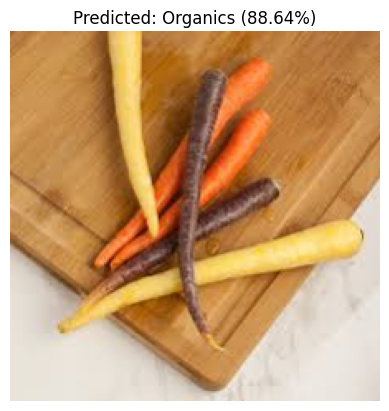

In [13]:
# Prediksi satu dari dataset test kelas sampah organics
predict_single_image('DATASET/TEST/O/O_12593.jpg', model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


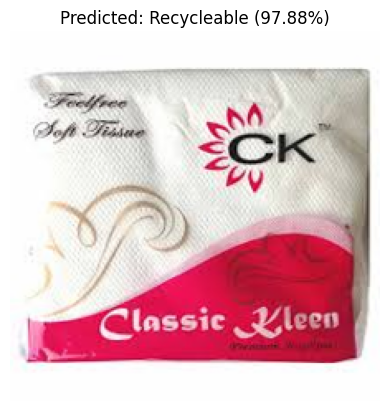

In [14]:
# Prediksi satu dari dataset test kelas sampah recycleable
predict_single_image('DATASET/TEST/R/R_11081.jpg', model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


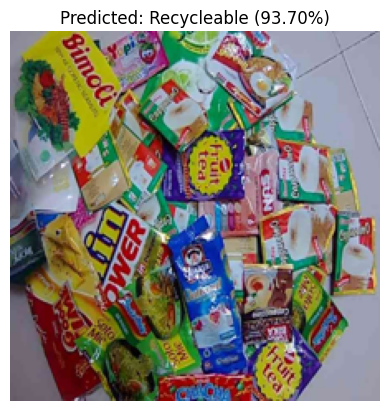

In [15]:
# Prediksi dataset baru
predict_single_image('DATASET/DATA INFERENCE BARU/bahan-tas-daur-ulang-66e94718ed64150b976ed172.jpeg', model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


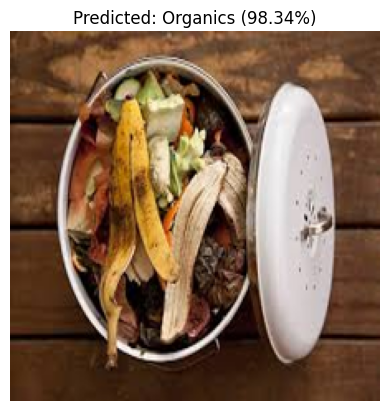

In [24]:
# Prediksi dataset baru
predict_single_image('DATASET/DATA INFERENCE BARU/coba 3.jpeg', model)

## 3. Hasil Inference

Hasil Inference:

1. Gambar pertama adalah hasil test menggunakan salah satu gambar dari `DATASET/TEST` yang menghasilkan prediksi gambar wortel adalah diklasifikasikan sebagai gambar sampah organik oleh model dengan persentase keyakinan sebesar 88.64 persen.

2. Gambar kedua adalah hasil test menggunakan gambar dari salah satu gambar pada `DATASET/TEST` yang menghasilkan prediksi gambar yang engklasifikan gambar tisu adalah sampah daur ulang (recycleable) dengan persentase keyakinan sebesar 97.88 persen.

3. Gambar ketiga dilakukan percobaan dataset baru yang diunduh melalui google image dengan percobaan mengambil sampel gambar sampah daur ulang secara acak dengan ekspektasi model dapat mengklasifikasikan gambar tersebut sebagai recycleable (sampah daur ulang). Hasil prediksi menghasilkan klasifikasi sampel gambar secara benar yang menghasilkan persentase keyakinan sebesar 93.70 persen.

4. Gambar keempat dilakukan juga percobaan untuk dataset baru yang diambil sampel acak dari google image dengan percobaan mengambil sampah organik denga ekspektasi model dapat memprediksi dengan benar. Hasil inferensi menghasilkan prediksi sampah organik yang benar dengan menampilkan persentase keyakinan sebesar 98.34 persen.